## ProjF2 - Data Exploration

Use this document as a template to provide some exploratory analysis of your data similar to the one in ProjC1. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [1]:
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install Pillow  # PIL is now part of Pillow
%pip install seaborn
%pip install tensorflow



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image
import seaborn as sns


### 1. Load and Visualize Data

Let's start by loading your entire dataset or a sample if it is a larger dataset.

In [2]:

df = pd.read_csv('./HAM10000_metadata.csv')
print(df)

df = df.sort_values('image_id', ascending=True)
df.head()


         lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]


,lesion_id,image_id,dx,dx_type,age,sex,localization
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest


In [3]:
import os
import glob
base_skin_dir = os.path.join('./skin-mnist-images')


imageid_path_dict = {
    os.path.splitext(os.path.basename(x))[0]: x
    for x in glob.glob(os.path.join(base_skin_dir, 'HAM10000_images_part_*', '*.jpg'))  # Adjusted pattern
}
imageid_path_dict


{'ISIC_0024306': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024306.jpg',
 'ISIC_0024307': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024307.jpg',
 'ISIC_0024308': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024308.jpg',
 'ISIC_0024309': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024309.jpg',
 'ISIC_0024310': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024310.jpg',
 'ISIC_0024311': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024311.jpg',
 'ISIC_0024312': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024312.jpg',
 'ISIC_0024313': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024313.jpg',
 'ISIC_0024314': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024314.jpg',
 'ISIC_0024315': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024315.jpg',
 'ISIC_0024316': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024316.jpg',
 'ISIC_0024317': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024317.jpg',
 'ISIC_0024318':

In [4]:
df['path'] = df['image_id'].map(imageid_path_dict)
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk,./skin-mnist-images\HAM10000_images_part_1\ISI...
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity,./skin-mnist-images\HAM10000_images_part_1\ISI...
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk,./skin-mnist-images\HAM10000_images_part_1\ISI...
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk,./skin-mnist-images\HAM10000_images_part_1\ISI...
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest,./skin-mnist-images\HAM10000_images_part_1\ISI...
...,...,...,...,...,...,...,...,...
1721,HAM_0004304,ISIC_0034316,mel,histo,85.0,male,upper extremity,./skin-mnist-images\HAM10000_images_part_2\ISI...
1888,HAM_0006376,ISIC_0034317,mel,histo,70.0,female,lower extremity,./skin-mnist-images\HAM10000_images_part_2\ISI...
121,HAM_0000344,ISIC_0034318,bkl,histo,55.0,male,trunk,./skin-mnist-images\HAM10000_images_part_2\ISI...
7440,HAM_0000747,ISIC_0034319,nv,histo,30.0,male,trunk,./skin-mnist-images\HAM10000_images_part_2\ISI...


# New Section

Provide some visualization of the data. For example,
- If your data is time series, you can plot a sequence and the response or label.
- If tabular data, you can plot histograms of the data.
- If working with image recognition or segmentation, you can show an image and the corresponding output.
- If it is a video that you are processing, just show screenshots.
- If doing something with reinforcement learning, you can provide samples of the simulation environment used.

In [5]:
# Creating New Columns for better readability

#Lesion Dictionary created for ease
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

df['cell_type'] = df['dx'].map(lesion_type_dict.get)
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk,./skin-mnist-images\HAM10000_images_part_1\ISI...,Melanocytic nevi,4
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity,./skin-mnist-images\HAM10000_images_part_1\ISI...,Melanocytic nevi,4
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk,./skin-mnist-images\HAM10000_images_part_1\ISI...,Melanocytic nevi,4
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk,./skin-mnist-images\HAM10000_images_part_1\ISI...,Melanocytic nevi,4
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest,./skin-mnist-images\HAM10000_images_part_1\ISI...,Melanoma,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10015 entries, 4349 to 7363
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lesion_id      10015 non-null  object 
 1   image_id       10015 non-null  object 
 2   dx             10015 non-null  object 
 3   dx_type        10015 non-null  object 
 4   age            9958 non-null   float64
 5   sex            10015 non-null  object 
 6   localization   10015 non-null  object 
 7   path           10015 non-null  object 
 8   cell_type      10015 non-null  object 
 9   cell_type_idx  10015 non-null  int8   
dtypes: float64(1), int8(1), object(8)
memory usage: 792.2+ KB


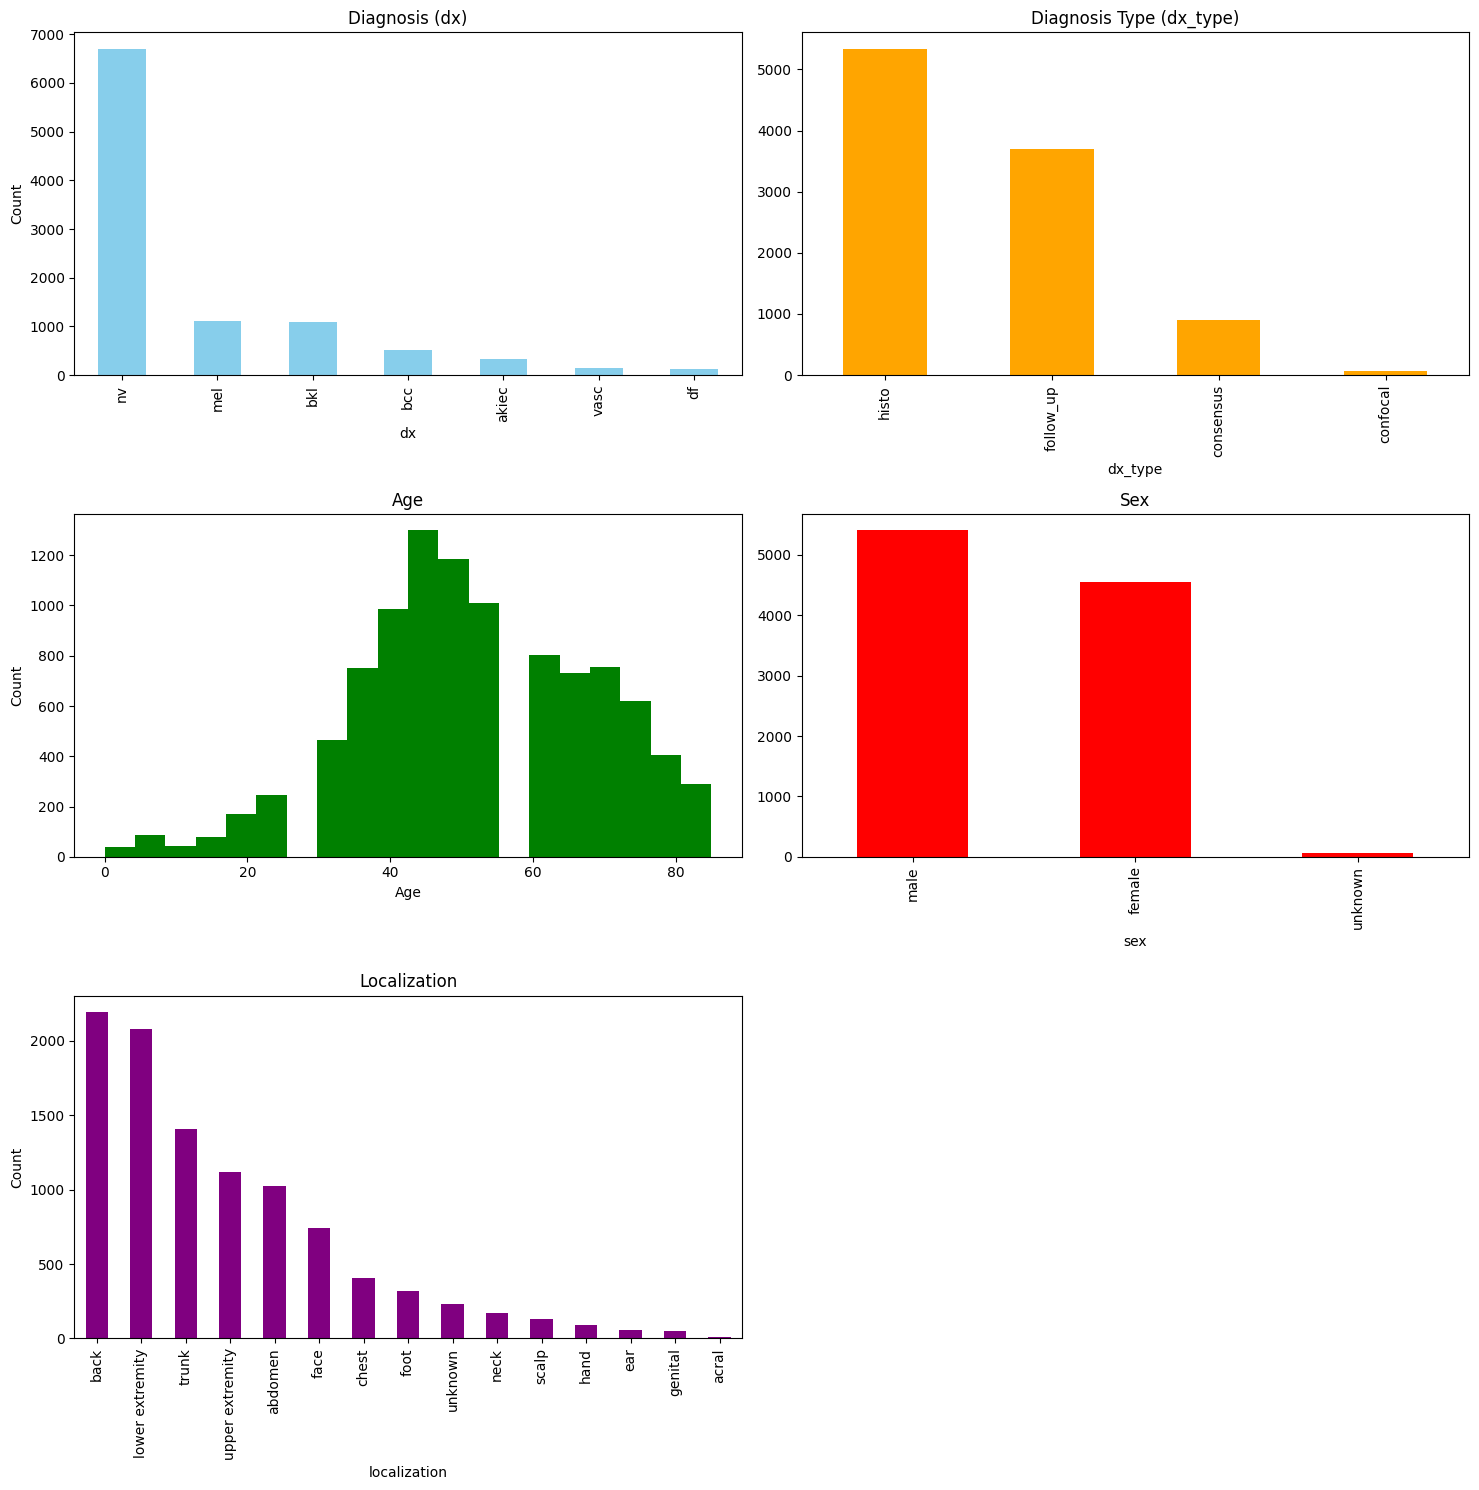

In [7]:
# @title Default title text
# Plotting histograms for 'dx', 'dx_type', 'age', 'sex', and 'localization'

fig, ax = plt.subplots(3, 2, figsize=(15, 15))

df['dx'].value_counts().plot(kind='bar', ax=ax[0, 0], color='skyblue')
ax[0, 0].set_title('Diagnosis (dx)')
ax[0, 0].set_ylabel('Count')

# Histogram of diagnosis type ('dx_type')
df['dx_type'].value_counts().plot(kind='bar', ax=ax[0, 1], color='orange')
ax[0, 1].set_title('Diagnosis Type (dx_type)')

# Histogram of age
df['age'].plot(kind='hist', bins=20, ax=ax[1, 0], color='green')
ax[1, 0].set_title('Age')
ax[1, 0].set_xlabel('Age')
ax[1, 0].set_ylabel('Count')

# Histogram of sex
df['sex'].value_counts().plot(kind='bar', ax=ax[1, 1], color='red')
ax[1, 1].set_title('Sex')

# Histogram of localization
df['localization'].value_counts().plot(kind='bar', ax=ax[2, 0], color='purple')
ax[2, 0].set_title('Localization')
ax[2, 0].set_ylabel('Count')

# Adjust layout and remove the empty subplot
plt.tight_layout()
fig.delaxes(ax[2,1])
plt.show()

# Histogram of diagnosis ('dx')


In [8]:
# Extracting some information about the image size. 

image_sizes = []

for path in df['path']:
    with Image.open(path) as img:
        
        size = img.size  
        image_sizes.append(size)


print("First 5 image sizes:", image_sizes[:5])


average_width = sum(size[0] for size in image_sizes) / len(image_sizes)
average_height = sum(size[1] for size in image_sizes) / len(image_sizes)
print(f"Average Image Size: {average_width} x {average_height}")


from collections import Counter
most_common_size = Counter(image_sizes).most_common(1)
print("Most common image size:", most_common_size[0][0], "with frequency:", most_common_size[0][1])

First 5 image sizes: [(600, 450), (600, 450), (600, 450), (600, 450), (600, 450)]
Average Image Size: 600.0 x 450.0
Most common image size: (600, 450) with frequency: 10015


In [10]:
# Adjusting the image size
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((75,100))))

In [13]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk,./skin-mnist-images\HAM10000_images_part_1\ISI...,Melanocytic nevi,4,"[[[228, 131, 134], [230, 128, 136], [230, 124,..."
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity,./skin-mnist-images\HAM10000_images_part_1\ISI...,Melanocytic nevi,4,"[[[217, 121, 134], [218, 124, 139], [217, 123,..."
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk,./skin-mnist-images\HAM10000_images_part_1\ISI...,Melanocytic nevi,4,"[[[246, 172, 180], [246, 171, 176], [247, 173,..."
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk,./skin-mnist-images\HAM10000_images_part_1\ISI...,Melanocytic nevi,4,"[[[207, 119, 134], [210, 120, 136], [209, 117,..."
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest,./skin-mnist-images\HAM10000_images_part_1\ISI...,Melanoma,5,"[[[71, 33, 38], [69, 32, 38], [67, 29, 35], [6..."


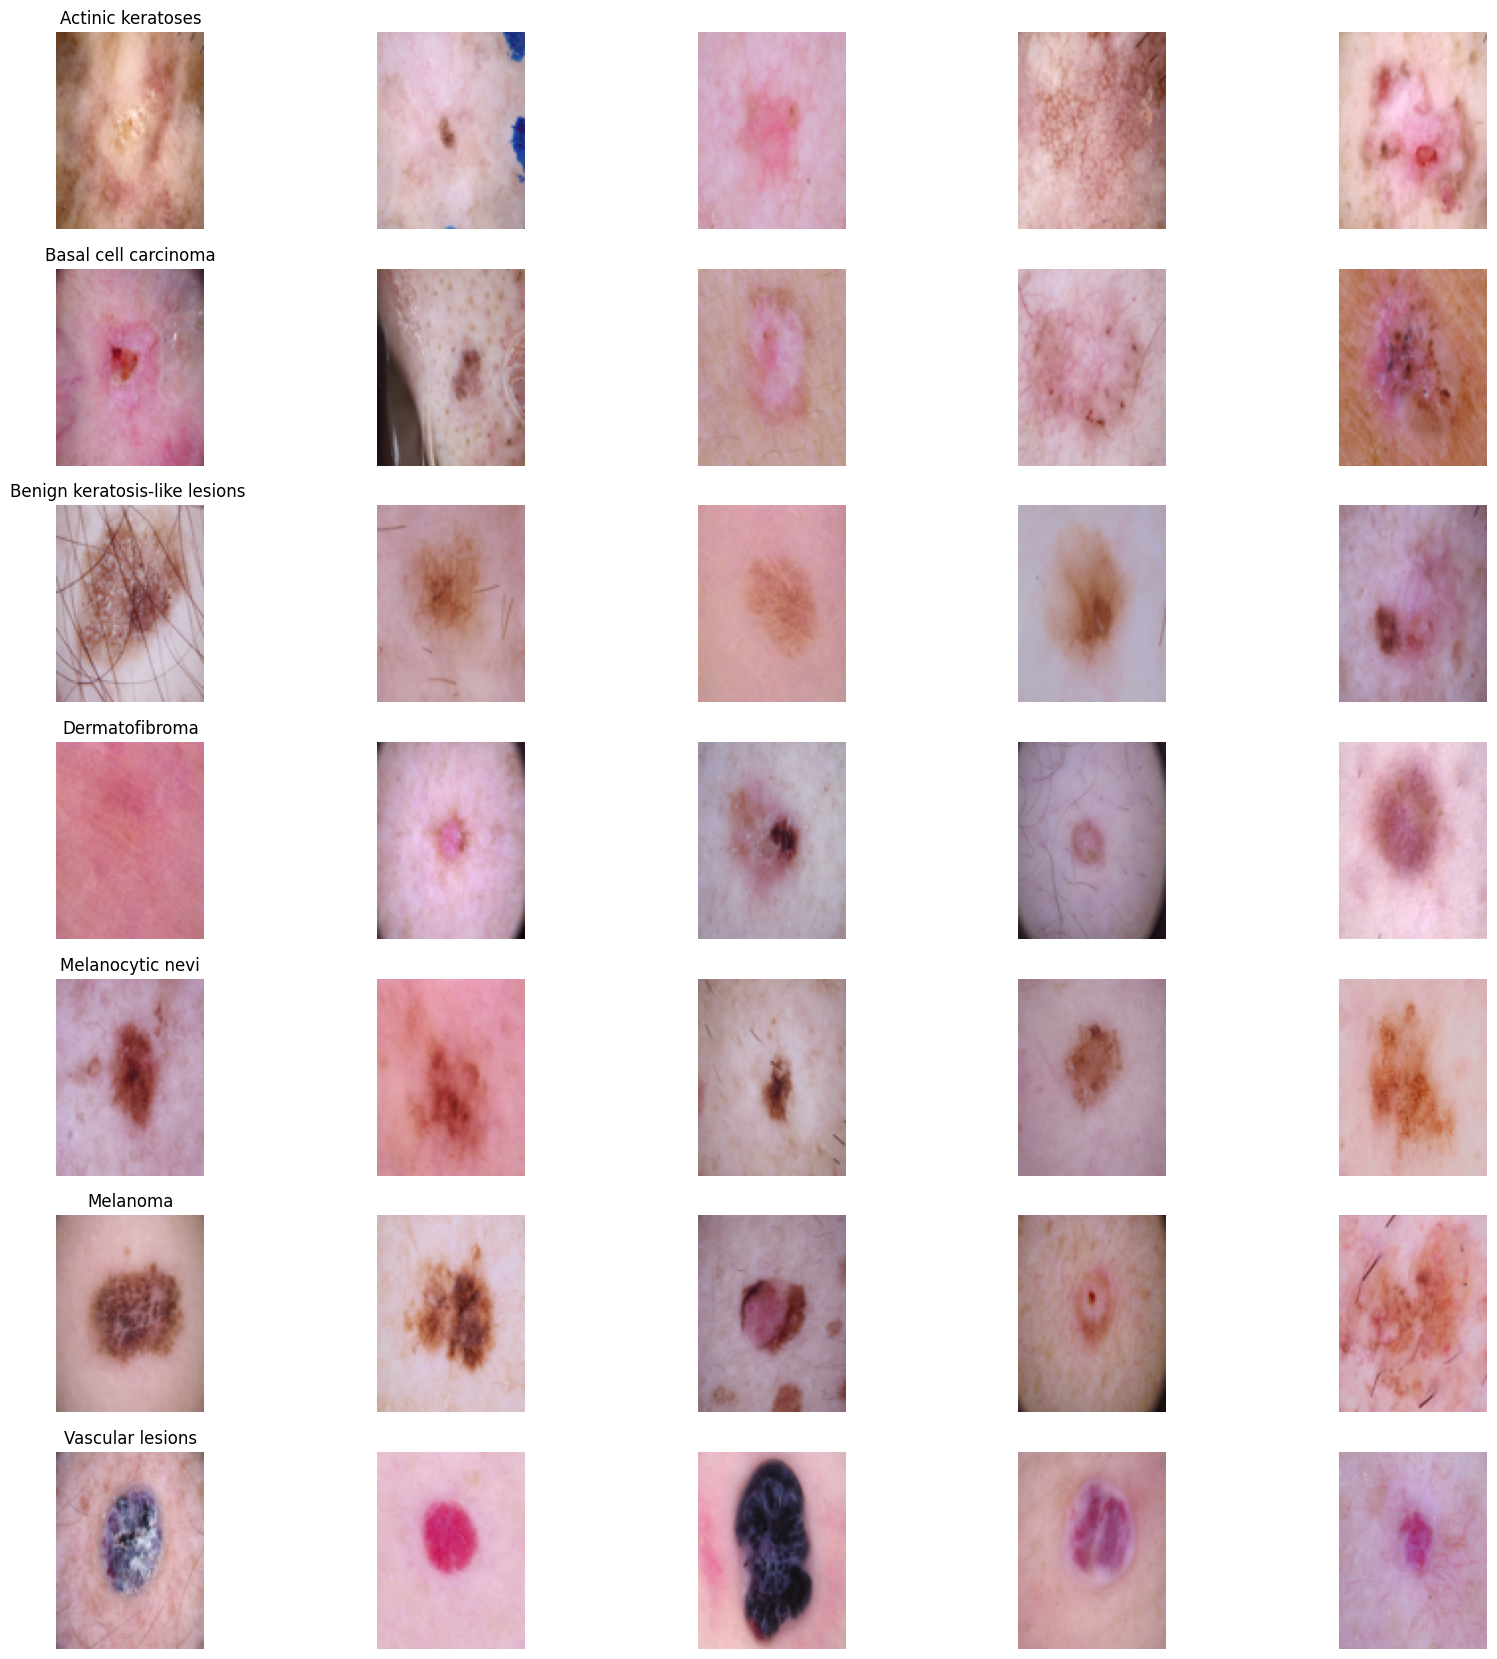

In [14]:
# Visualize the images
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

### 2. Compute Some Statistics from your Data

First, extract some characterisitics about the input (e.g., image size, means and standard deviation of values, sample frequency).

*We have provided the information regarding the image size above.* 

In [11]:
# Calculate mean and standard deviation of pixel values across all images
pixel_means = np.mean([np.mean(image) for image in df['image']])
pixel_stds = np.mean([np.std(image) for image in df['image']])

print(f"Mean pixel value across all images: {pixel_means}")
print(f"Standard deviation of pixel values across all images: {pixel_stds}")

Mean pixel value across all images: 159.81846082875688
Standard deviation of pixel values across all images: 40.64012439203612


In [28]:
df.describe()

,age,cell_type_idx
count,9958.000000,10015.000000
mean,51.863828,3.623964
std,16.968614,1.208859
min,0.000000,0.000000
25%,40.000000,4.000000
50%,50.000000,4.000000
75%,65.000000,4.000000
max,85.000000,6.000000


In [29]:
# Calculate the frequency of age
age_counts = df['age'].value_counts()
print(age_counts)

45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
0.0       39
Name: age, dtype: int64


In [32]:
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import matplotlib.pyplot as plt


Next, provide some characteristics about your output (e.g., histograms, spatial distribution of bounding boxes in the case of object detection, etc.). In the case of cases such as tasks such as reinforcement learning, you can provide details about the desired output and rewards used. You can show some correlations between inputs and outputs if possible.

array([[<Axes: title={'center': 'akiec'}>,
        <Axes: title={'center': 'bcc'}>, <Axes: title={'center': 'bkl'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'mel'}>,
        <Axes: title={'center': 'nv'}>],
       [<Axes: title={'center': 'vasc'}>, <Axes: >, <Axes: >]],
      dtype=object)

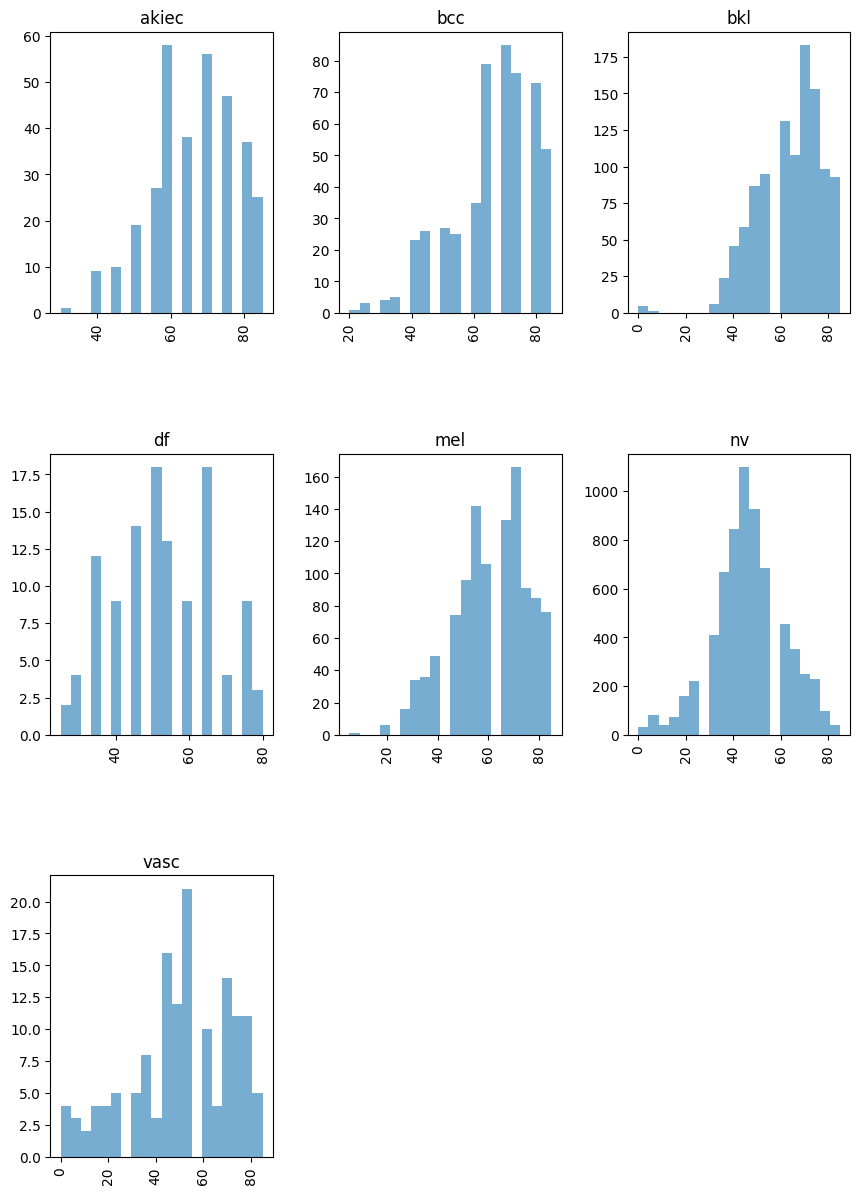

In [8]:
## CHECK DISTRIBUTION OF CLASSES BY AGE
df['age'].hist(by=df['dx'], bins=20, alpha=0.6, figsize=(10, 15))

array([[<Axes: title={'center': 'akiec'}>,
        <Axes: title={'center': 'bcc'}>, <Axes: title={'center': 'bkl'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'mel'}>,
        <Axes: title={'center': 'nv'}>],
       [<Axes: title={'center': 'vasc'}>, <Axes: >, <Axes: >]],
      dtype=object)

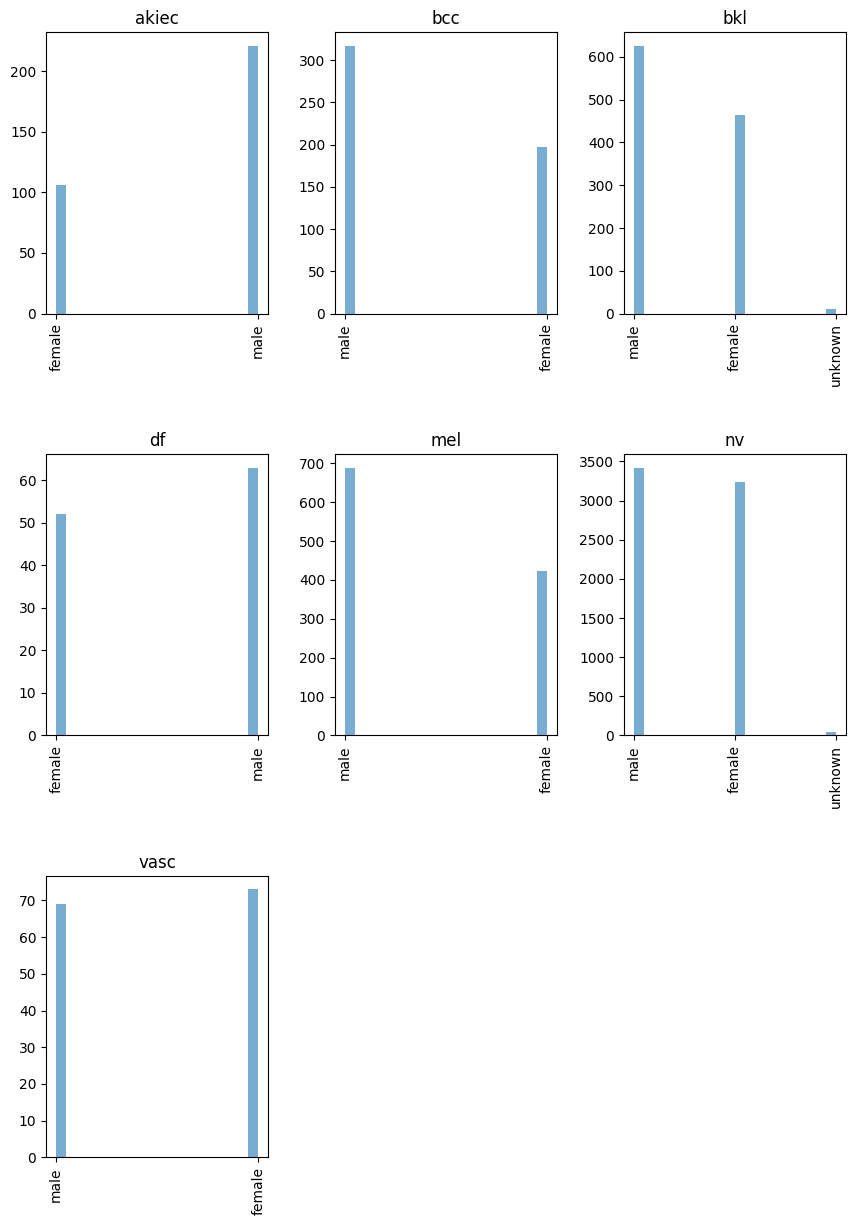

In [9]:
## CHECK DISTRIBUTION OF CLASSES BY SEX
df['sex'].hist(by=df['dx'], bins=20, alpha=0.6, figsize=(10, 15))

array([[<Axes: title={'center': 'akiec'}>,
        <Axes: title={'center': 'bcc'}>, <Axes: title={'center': 'bkl'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'mel'}>,
        <Axes: title={'center': 'nv'}>],
       [<Axes: title={'center': 'vasc'}>, <Axes: >, <Axes: >]],
      dtype=object)

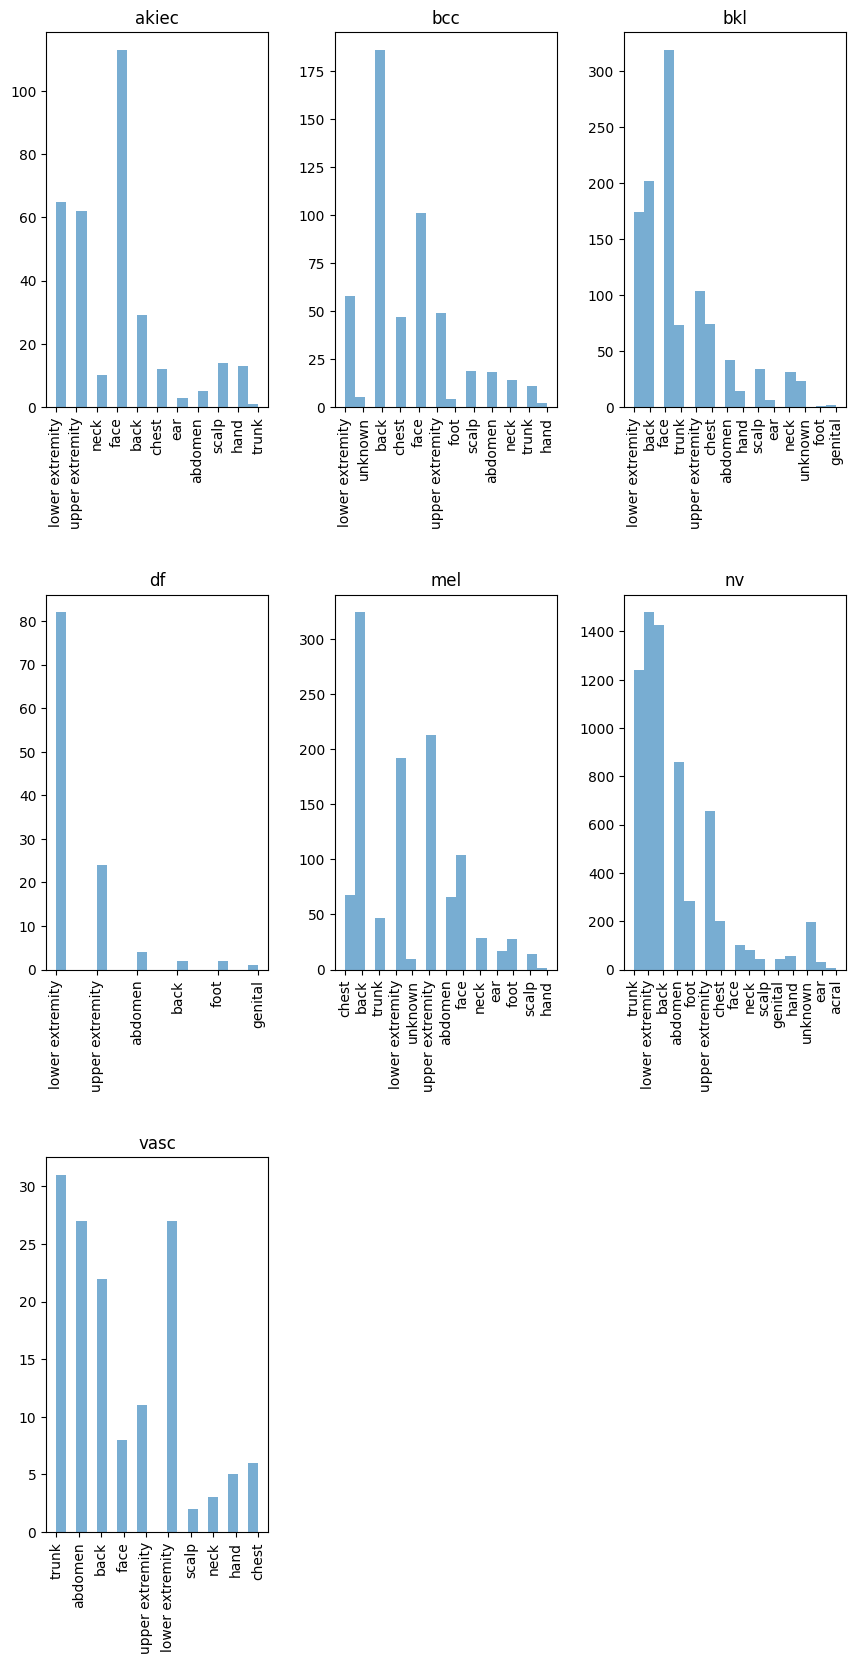

In [10]:
## AFFECTED BODY AREAS BY CLASS
df['localization'].hist(by=df['dx'], bins=20, alpha=0.6, figsize=(10, 20))

In [ ]:
skin = df.groupby(['localization']).size().sort_values(ascending=False, inplace=False).reset_index()
skin.columns = ['localization', 'count']
sort_by = skin['localization']
heat_map = df.groupby(['age','localization']).size().reset_index()
heat_map.columns = ['age', 'localization', 'count']
heat_map.sort_values('count', ascending=False, inplace=True)

def heatmap(df, index,columns,values,vmax,sort_by,Title):
    df_wide = df.pivot(index=index, columns=columns, values=values)
    df_wide = df_wide.reindex(index=sort_by)
    plt.figure(figsize=(12,8))


    
    pink = sns.color_palette("pink", n_colors=2)[0]  
    black = sns.color_palette("black")  

    # Create a custom colormap
    cmap = sns.cubehelix_palette(light=pink, dark=black, rot=-.5)

    ax = sns.heatmap(df_wide, annot=True, fmt='.0f', yticklabels='auto', 
                 cmap=cmap, center=.2, vmin = 0, vmax = vmax, linewidths=.5)

    ax.xaxis.tick_top() 
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(columns,fontsize = 14,weight = 'bold')
    ax.set_ylabel(index,fontsize = 14,weight = 'bold')    
    ax.set_title(Title,fontsize = 16,weight = 'bold',pad=20)
    plt.show()
    
heatmap(heat_map,'localization', 'age','count', 20,sort_by,'Age and Localization of Melanomas')

<Axes: xlabel='age', ylabel='cell_type_idx'>

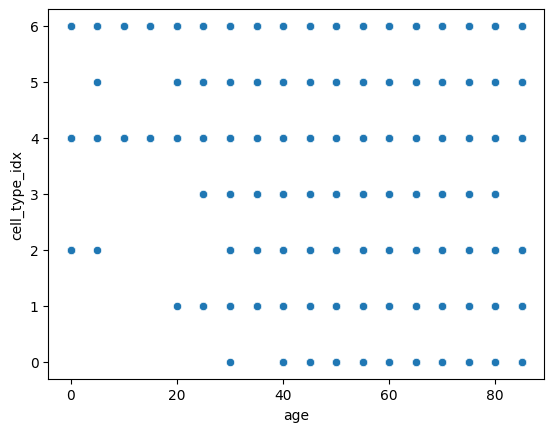

In [11]:
### YOUR CODE HERE
sns.scatterplot(x = 'age',y = 'cell_type_idx',data=df)

**It seems that skin cancer types 0,1, 3 and 5 which are Melanocytic nevi,dermatofibroma,Basal cell carcinoma and Vascular lesions are not much prevalant below the age of 20 years.**

### 3. Comment on Your Data

Answer these questions as appropriate?
- Is your data balanced?

Ans. The dataset is not balanced. The distribution of the classes is as follows:

- **NV (Melanocytic nevi)**: 66.95%
- **MEL (Melanoma)**: 11.11%
- **BKL (Benign keratosis-like lesions)**: 10.97%
- **BCC (Basal cell carcinoma)**: 5.13%
- **AKIEC (Actinic keratoses and intraepithelial carcinoma / Bowen's disease)**: 3.27%
- **VASC (Vascular lesions)**: 1.42%
- **DF (Dermatofibroma)**: 1.15%

The class 'nv' (Melanocytic nevi) significantly outnumbers the other classes, making up nearly 67% of the data


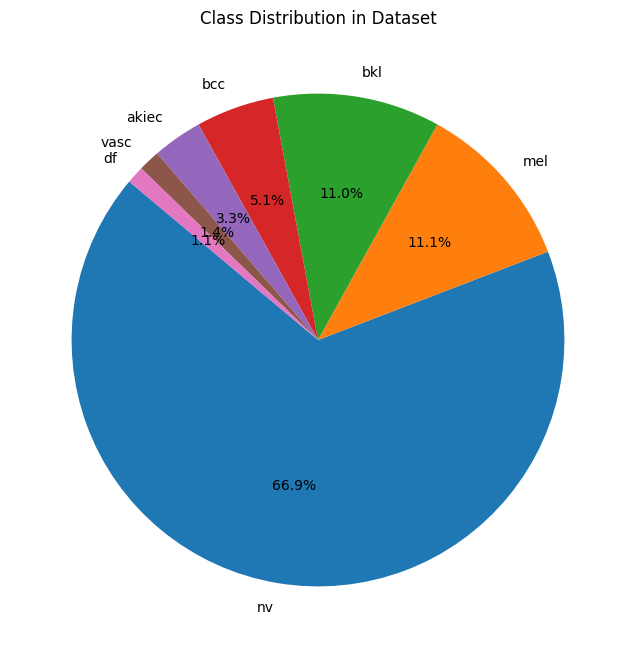

In [12]:
class_counts = df['dx'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution in Dataset')
plt.show()

- Are there disparities in your input data? Does it show some specific patterns?

Ans. Based on the class distribution , several disparities and patterns emerge from the dataset:

1. *Significant Imbalance Among Classes*: The most striking disparity is the imbalance in the dataset. The nv (Melanocytic nevi) class makes up nearly 67% of the dataset, overshadowing the other classes. Such a imbalance can lead to models that are biased towards predicting the majority class, potentially reducing the model's performance on minority classes.

2. *Minor Classes*: The vasc (Vascular lesions) and df (Dermatofibroma) classes are the smallest, each constituting around 1% of the dataset. The small size of these classes compared to others might result in underrepresentation during model training, making it challenging for the model to learn these classes effectively.

3. *Middle-Tier Classes*: Classes such as mel (Melanoma), bkl (Benign keratosis-like lesions), and bcc (Basal cell carcinoma) represent a middle tier in terms of distribution, each ranging from about 5% to 11% of the dataset. While not as dominant as nv, these classes still have a significant presence that could influence model learning.

4. *Potential for Model Bias*: Given the heavy skew towards the nv class, there's a potential for developing a model that is biased towards predicting this class more frequently. 

5. *Need for Balanced Data Handling Techniques*: The disparities in the dataset suggest a need for techniques that can help balance the data, such as oversampling the minority classes, undersampling the majority class, or employing synthetic data generation methods (e.g., SMOTE) to improve the dataset balance. 

6. *Patterns in Medical Conditions*: The distribution might also reflect real-world prevalences and the collection biases of the dataset, indicating patterns in how common certain skin conditions are or how frequently they are documented in medical datasets. This aspect can influence how the data should be interpreted and used for modeling purposes.

Addressing these disparities is crucial for developing robust models that can accurately classify all conditions represented in the dataset, especially in critical applications like medical diagnosis.